# Load the necessary libraries

In [184]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import os
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# Load and simplify the data

In [185]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [186]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [187]:
df.rename(columns={'v1': 'class_label', 'v2': 'message'}, inplace=True)

In [188]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [189]:
df.head()

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Explore the dataset, world cloud

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_label  5572 non-null   object
 1   message      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


## Handle inbalance

In [191]:
print(len(df[df['class_label'] == 'ham']))
print(len(df[df['class_label'] == 'spam']))

4825
747


In [192]:
df[df['class_label'] == 'ham'] = df[df['class_label'] == 'ham'][:747]
df.dropna(inplace=True)


In [195]:
df

,class_label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [196]:
df_spam = df[df['class_label'] == 'spam']
df_ham = df[df['class_label'] == 'ham']

In [197]:
spam_list = df_spam['message'].tolist()
ham_list = df_ham['message'].tolist()

In [198]:
spam_str = ""
for i in spam_list:
    spam_str += str(i) + " "
spam_str = spam_str[:-1]
spam_str = spam_str.lower()

ham_str = ""
for i in ham_list:
    ham_str += str(i) + " "
ham_str = ham_str[:-1]
ham_str = ham_str.lower()


# Spam Wordcloud

In [199]:
# Create and generate a word cloud image
wordcloud_spam = WordCloud(max_font_size=160, margin=0, background_color='black',
                           colormap='tab20c').generate(spam_str)

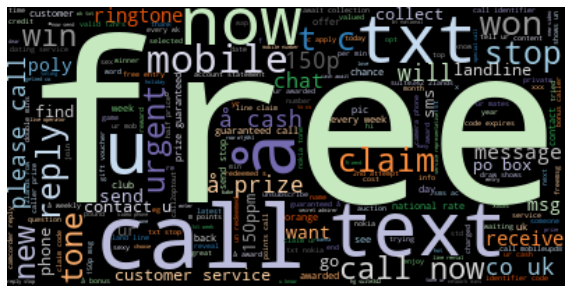

In [200]:
# Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("Off")
plt.show()

# Ham Wordcloud

In [201]:
wordcloud_ham = WordCloud(max_font_size=160, margin=0, background_color='black',
                           colormap='tab20c').generate(ham_str)

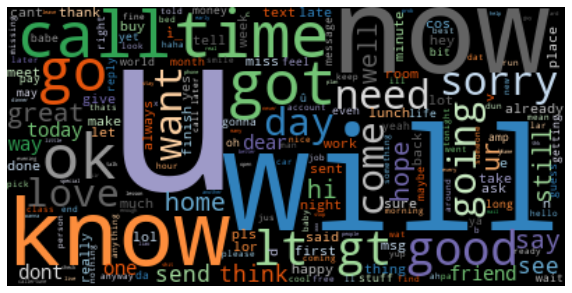

In [202]:
# Display the generated image
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis("Off")
plt.show()

# Convert class labels to numeric form and split the dataset

In [203]:
df['class_label'] = df['class_label'].apply(lambda x: 1 if x == 'spam' else 0)

In [204]:
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class_label'],
                                                    test_size=0.25, random_state=0)

In [205]:
lst = x_train.tolist()
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
features_train_transformed = vectorizer.fit_transform(lst) #gives tf idf vector for x_train
features_test_transformed  = vectorizer.transform(x_test) #gives tf idf vector for x_test

# Train our model

### Naive Bayes

In [206]:
classifier_nb = MultinomialNB()
classifier_nb.fit(features_train_transformed, y_train)

MultinomialNB()

# Get our classifier scores

In [207]:
predicted = classifier_nb.predict(features_test_transformed)
actual = y_test.tolist()

results = confusion_matrix(actual, predicted)
print('Confusion Matrix :')
print(results)
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted) )
score_2 = f1_score(actual, predicted, average = 'binary')
print('F-Measure: %.3f' % score_2)

Confusion Matrix :
[[167  21]
 [  4 182]]
Accuracy Score : 0.9331550802139037
Report : 
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       188
           1       0.90      0.98      0.94       186

    accuracy                           0.93       374
   macro avg       0.94      0.93      0.93       374
weighted avg       0.94      0.93      0.93       374

F-Measure: 0.936


# Create a heatmap of confusion_matrix

<AxesSubplot:>

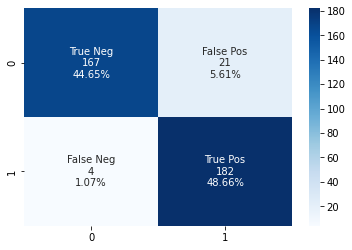

In [208]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in results.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap='Blues')